# Project: Investigate a Dataset TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Welcome to the TMDb dataset analysis. The TMDb is a dataset about movies. In this study, we'll search for answers for some questions like: 

* Actors that most appears in movies
* What is the most popular gender grouped by years for the last 10 years?
* Is it Movies with higher budget make more revenue?

### Importing libs

Here we'll import all the tools used in this study. We'll use pandas and numpy to manipulate data in datasets and matplotlib and seaborn to plot the results found in charts. We also use locale library to format currency values to a better visualization.


In [1]:
# IMPORTING LIBS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale

In [2]:
# defining global settings
plt.rcParams["figure.figsize"] = [16,9]
locale.setlocale(locale.LC_MONETARY, 'en_US.UTF-8')

'en_US.UTF-8'

<a id='wrangling'></a>
## Data Wrangling

### Loading dataset and creating the main dataframe

In [3]:
# load tmdb dataset and create a new dataframe
df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv')

## Preparing data for analysis

Before start analysis the TMDb movie dataset to answer the above questions it is necessary to prepare our dataset. The first step is to keep only the features that will be used for the purpose of this analysis. Some features will not be necessary and it will be removed from the original dataset. These columns are: 'id', 'imdb_id', 'homepage', 'overview', 'keywords', 'tagline', 'production_companies', 'budget_adj', 'revenue_adj'.

#### View of dataframe structure before removing useless columns

In [5]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [6]:
#REMOVING COLUMNS
columns = ['id', 'imdb_id', 'homepage', 'overview', 'keywords', 'tagline', 'production_companies', 'budget_adj', 'revenue_adj']
df.drop(axis=1, columns=columns, inplace=True)
df.head(1)


,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015


### Data Cleaning (Removing null values from dataframe)

There are some null values in the following columns: cast, director and genre. we cannot fill these features with default values so we need to remove them.

In [7]:
#check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 1018.8+ KB


In [8]:
# removing null values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10732 non-null float64
budget            10732 non-null int64
revenue           10732 non-null int64
original_title    10732 non-null object
cast              10732 non-null object
director          10732 non-null object
runtime           10732 non-null int64
genres            10732 non-null object
release_date      10732 non-null object
vote_count        10732 non-null int64
vote_average      10732 non-null float64
release_year      10732 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 1.1+ MB


#### Removing zero values in currency columns

Another problem detected is: Some movies don't have budget and revenue values. we need to delete them before begin.


In [0]:
# check for revenue and budget values equal to 0
df = df.query('revenue != 0')
df = df.query('budget != 0')

df[(df[['budget', 'revenue']] == 0).any(axis=1)]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year


We finished cleaning our data. Let's see how they are distributed in the histogram chart.

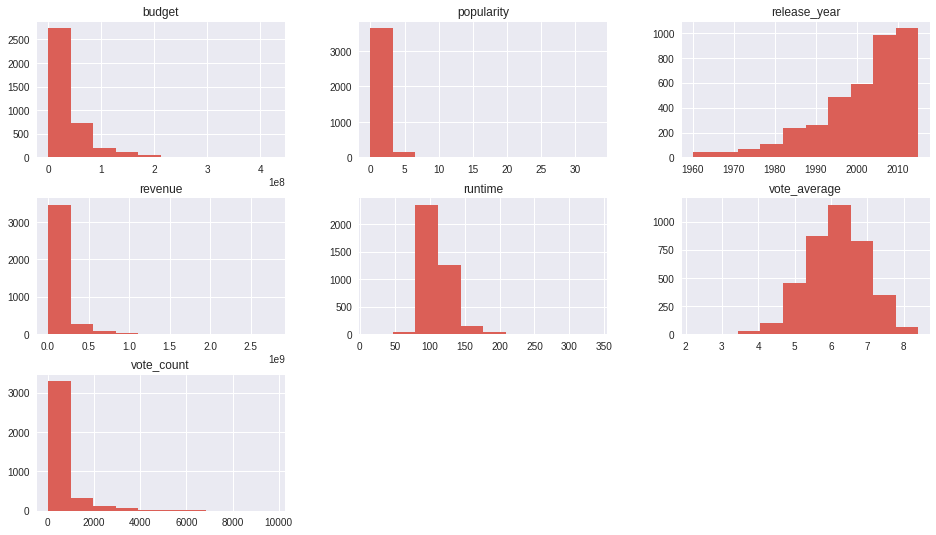

In [0]:
df.hist();

<a id='eda'></a>
## Exploratory Data Analysis


## Research Question 1 - Actors that most appears in movies

All Actors that participate in movies inside this dataset are stored in one column called "cast". This column is a string containing the actors separated with a pipe character. One actor may participate in more than one movie. We need the name of all actors in this dataset without duplicated values so we'll create a new actors data frame starting from column cast.

In [0]:
# check type from cast values
type(df['cast'].values[0])

str

#### Creating a new dataframe starting from column cast

In [0]:
#create a dataframe with all actors in dataset
actors = list()
def set_actors(list_actors):
  for actor in list_actors.split('|'):
    actors.append(actor)

df['cast'].apply(set_actors)

# create a new series and remove duplicated values
actors = pd.Series(actors)
actors.drop_duplicates(inplace=True)

# create a new dataframe from series actors

actors_df = pd.DataFrame(data = {'id': range(len(actors)), 'actor': pd.Series(actors)})
actors_df.head()

,actor,id
0,Chris Pratt,0
1,Bryce Dallas Howard,1
2,Irrfan Khan,2
3,Vincent D'Onofrio,3
4,Nick Robinson,4


#### Create a new column changing actors name to actors id in the main dataframe

After creating the actor's dataset we need to create a new column in the main dataset changing the name of the actors for the respective id from actors dataset. We'll do that to optimize the counting process in the next step.

In [0]:
#create a series to convert the name of actor to int
def convert_to_int(cast):
  actors = actors_df[actors_df['actor'].isin(cast)]
  return actors['id'].values

array_cast = df['cast'].str.split('|').apply(convert_to_int)
df['id_cast'] = array_cast
print('Column id_cast successfully created')

Column id_cast successfully created


#### Counting actors

Finally, we can count the number of movies each actor participated.

In [0]:
#count total movies by actor
actors_id = actors_df['id'].values
cast_id = df['id_cast'].values

ids = []
films_by_actors = {'actor':[], 'total':[]}

for ci in cast_id:
  for id in ci:
    ids.append(id)

ids = np.array(ids)
def count_movies_by_actor(row):
  actor = row['actor']
  id = row['id']
  
  total = len(np.where(id == ids)[0])
  
  films_by_actors['actor'].append(actor)
  films_by_actors['total'].append(total)
    
total_count = actors_df.apply(count_movies_by_actor,axis=1)

### Checking the results

After counting finished we can check the result and plot a chart for better visualization.

In [0]:
# 10 ACTORS THAT MOST APPEARS IN MOVIES
total_movies_by_actors_df = pd.DataFrame(films_by_actors).sort_values(by='total',ascending=False)[:10]
total_movies_by_actors_df.head(10)


,actor,total
220,Robert De Niro,52
571,Bruce Willis,46
73,Samuel L. Jackson,44
808,Nicolas Cage,43
34,Matt Damon,36
242,Johnny Depp,35
119,Brad Pitt,34
15,Harrison Ford,34
703,Morgan Freeman,34
282,Sylvester Stallone,34


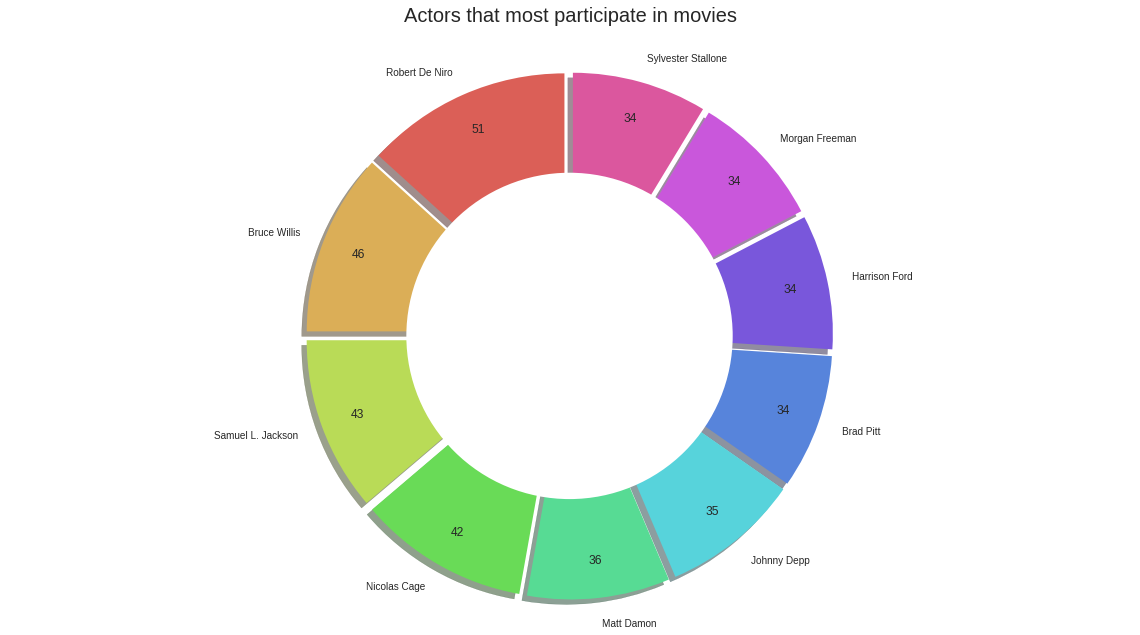

In [0]:
# CREATE A CHART TO BETTER VIEW THE RESULTS
values = total_movies_by_actors_df['total'].values

labels = total_movies_by_actors_df['actor'].values
total = values.shape[0]

sns.set_palette(sns.color_palette('hls', total))
explode=(np.repeat(0.05, total))

fig, ax = plt.subplots()

ax.pie(values, explode=explode, autopct=lambda x: int(x/100.*values.sum()), labels=labels, shadow=True, startangle=90, pctdistance=0.85);

ax.axis('equal')
ax.set_title('Actors that most participate in movies', pad=25, fontdict={'fontsize': 20});

cc = plt.Circle((0,0), 0.65, fc='white')
plt.gcf().gca().add_artist(cc)

plt.tight_layout();
plt.show()

## Research Question 2 - What is the most popular genre grouped by 10 years?

In the second question, we'll try to group by genre movies in intervals of ten years and keep only the most popular genres in each period. To do that we need to retrieve all genres present inside the dataset, separate them in a new series, remove all duplicated genres and calculate the mean value from popularity column in the main dataframe.

### Creating a series of genres

In the first step, we'll create a new series with all genres present in the main dataset and remove the duplicated values. But before that, we need to get the values and split them by pipe character.

In [0]:
# retrieve genres and remove duplicated values

genres = []

[genres.extend(genre.split('|')) for genre in df['genres'].values]
genres = pd.Series(genres)
genres.drop_duplicates(inplace=True)

###Defining the range of years for groups of genres

Now we'll get the oldest release and the newest release present in the main dateset and setting them as a range for calculating de popularity. We'll set a variable with year interval too.

In [0]:
# set intervals and between release years and the range of ten years
oldest_release = df['release_year'].min()
newest_release = df['release_year'].max()
years = 10

#### Calculating the mean popularity

In [0]:
# group genres by years and calculate mean from popularity
release_year = {}

while(oldest_release < newest_release):
  
  period = df.query('release_year >= {} and release_year <= {}'.format(oldest_release, (oldest_release + 10)))
    
  most_popular = -1
    
  for genre in genres:
    
    popularity = period.loc[period['genres'].str.contains(genre)]['popularity'].mean()
    
    if(most_popular < popularity):
      most_popular = popularity
      movie_genre = {'period': '', 'genre': '', 'popularity': ''}
      movie_genre['genre'] = genre
      movie_genre['period'] = oldest_release
      movie_genre['popularity'] = popularity
      release_year[oldest_release] = movie_genre;
  
  oldest_release += years

### Checking the results

At the end, we have a new dataframe with the most popular genres grouped by a period of 10 years

In [0]:
# show results from process

movies_grouped_by_period = pd.DataFrame(list(release_year.values()))

movies_grouped_by_period.sort_values(by='period', ascending=False)

,genre,period,popularity
5,Science Fiction,2010,3.628470
4,Fantasy,2000,1.922326
3,Animation,1990,1.558176
2,Adventure,1980,1.253894
1,Science Fiction,1970,1.564181
0,Animation,1960,2.373218


## Research Question 3 - Is it Movies with higher budget make more revenue?



In the third question, we'll try to find a relation between budget and revenue. Is it movies with a higher budget always make more revenue? Plot all values will difficult the visualization so we'll plot two charts: one with 10 movies with a higher budget and another with a sample with random movies. We'll create two new columns to help visualization of currency values.

In [0]:
#defining functions


def format_currency(value):
  """
  format currency values
  """
  return locale.currency(value, grouping=True)


def bar_plot(budget, revenue, movie, title):
  """
  plot bar chart in horizontal orientation
  """
  index = np.arange(len(budget))
  
  values = ['Revenue', 'Budget']
  bar_width = 0.35
  
  plt.barh(index, revenue.apply(lambda x: x/1000000), bar_width, color='blue');
  plt.barh(index+bar_width, budget.apply(lambda x: x/1000000), bar_width, color='red');
        
  plt.yticks(index, movie)
      
  plt.xlabel('Currency values represented in millions', labelpad=20)
  plt.legend(values)
  plt.title(title, pad=20, fontdict={'fontsize':20})
  
  plt.show();

def plot_chart(chart_df):
  movies = chart_df['original_title']
  revenue = chart_df['revenue']
  budget = chart_df['budget']
  title = '10 movies with highest budget'

  bar_plot(budget, revenue, movies, title)

In [0]:
# FORMAT CURRENCY VALUES FOR BETTER VISUALIZATION
df['budget_fmt'] = df['budget'].apply(format_currency) 
df['revenue_fmt'] = df['revenue'].apply(format_currency)

In [0]:
# DEFINING COLUMN NAMES
columns = ['original_title', 'release_year', 'budget_fmt', 'revenue_fmt', 'budget', 'revenue']

### Movies with highest budget

The first try will be with the movies with the highest budget. In the following cells, we can see the values from pandas and a chart for better visualization.

In [0]:
# 10 MOVIES WITH HIGHER BUDGET
highest_budget_df = df.sort_values(by='budget', ascending=False)[columns][:10]
highest_budget_df[columns[:4]]

,original_title,release_year,budget_fmt,revenue_fmt
2244,The Warrior's Way,2010,"$425,000,000.00","$11,087,569.00"
3375,Pirates of the Caribbean: On Stranger Tides,2011,"$380,000,000.00","$1,021,683,000.00"
7387,Pirates of the Caribbean: At World's End,2007,"$300,000,000.00","$961,000,000.00"
14,Avengers: Age of Ultron,2015,"$280,000,000.00","$1,405,035,767.00"
6570,Superman Returns,2006,"$270,000,000.00","$391,081,192.00"
4411,John Carter,2012,"$260,000,000.00","$284,139,100.00"
1929,Tangled,2010,"$260,000,000.00","$591,794,936.00"
7394,Spider-Man 3,2007,"$258,000,000.00","$890,871,626.00"
5508,The Lone Ranger,2013,"$255,000,000.00","$89,289,910.00"
643,X-Men: Days of Future Past,2014,"$250,000,000.00","$746,000,000.00"


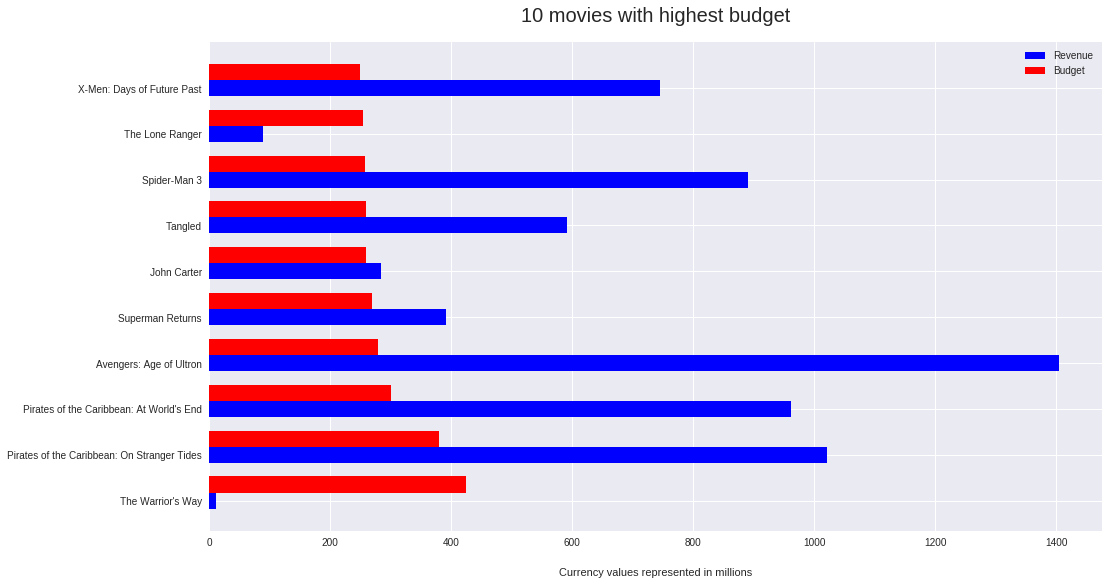

In [0]:
# BAR CHART FOR BETTER VISUALIZATION
plot_chart(highest_budget_df)

It seems that higher budget not necessarily implies in a higher revenue as we can see in Avengers and Pirates of Caribbean movies. Avengers movie has a smaller budget than Pirates of the Caribbean but has higher revenue. We can also see movies that didn't have profit. The warrior's way and The lone range has the highest budget than the revenue. Let's compare the random sample to check if we get the same results.

### Random sample of movies


In [0]:
# RANDOM SAMPLE OF MOVIES WITH HIGHER BUDGET
highest_budget_df = df.sort_values(by='budget', ascending=False)[columns][10:].sample(n=10, random_state=42).sort_values(by='budget', ascending=False)
highest_budget_df[columns[:4]]

,original_title,release_year,budget_fmt,revenue_fmt
1413,Coraline,2009,"$60,000,000.00","$124,596,398.00"
3078,The Express,2008,"$40,000,000.00","$9,793,496.00"
2577,Play It to the Bone,1999,"$24,000,000.00","$8,434,146.00"
755,Endless Love,2014,"$20,000,000.00","$34,077,920.00"
9147,The Object of My Affection,1998,"$15,000,000.00","$46,905,889.00"
6925,For Your Consideration,2006,"$12,000,000.00","$5,542,025.00"
10689,Thunderball,1965,"$11,000,000.00","$141,195,658.00"
9514,Above the Law,1988,"$7,500,000.00","$18,869,631.00"
10755,Grease,1978,"$6,000,000.00","$181,813,770.00"
8944,Death Wish 2,1982,$2.00,$16.00


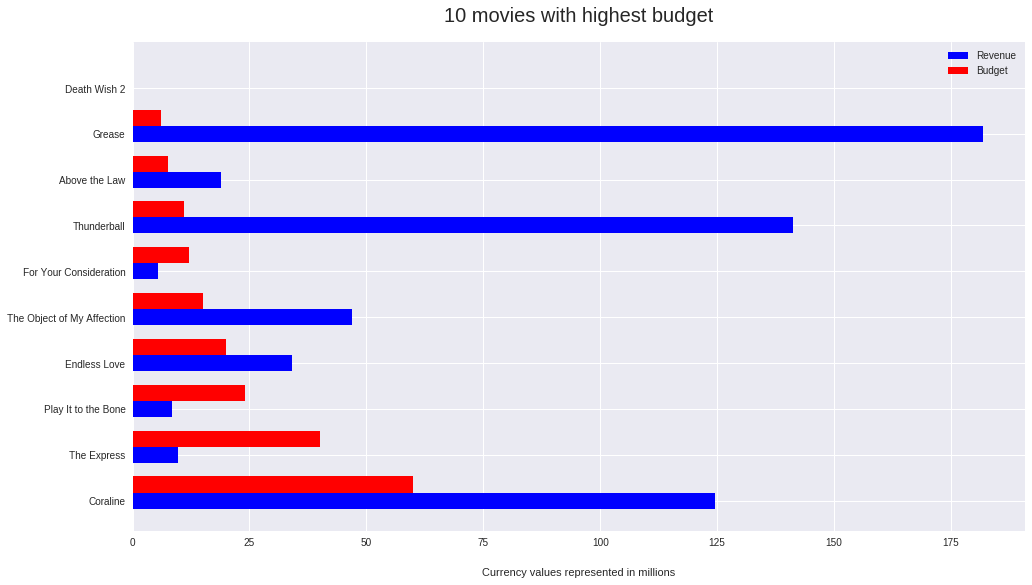

In [0]:
# BAR CHART FOR BETTER VISUALIZATION
plot_chart(highest_budget_df)

A similar result may be seen here, higher budget not always implies in a higher revenue as we can see in a comparison between Grease and Coraline movies.

<a id='conclusions'></a>
## Conclusions

At the end of this study, we found the answers to all questions proposed for this analysis. We discovered that Robert De Niro is the actor that most participate in movies in this dataset, the genre Science Fiction got the highest mean popularity for the period from 2010, that a higher budget is not the main feature the makes a movie most popular and we reach all the conclusion using the tools proposed at the beginning of this study. Unfortunately, the lack of some values decreased the amount of data in the final result once we have to remove them in the cleaning section and maybe we had a different result if all the values were completed. Another point that would be interesting in this dataset would be the presence of two features: nationality of the movie and the original language. If these features were present would allow the combination with other features to find different results in the final analysis.